In [1]:
# ---------------------------------------------------------------
# 📊 The_iScale Movies Data Analysis Project
# ---------------------------------------------------------------

# 🎯 Objective:
# Perform exploratory data analysis (EDA) on a curated movie dataset
# to uncover insights about genre frequency, vote patterns, popularity scores,
# and release trends. Clean and transform the data for meaningful visualizations.

# 📂 Dataset Overview:
# - Source: 'mymoviedb.csv'
# - Original Rows: 9827
# - Final Rows after genre explosion: 25,552
# - Columns used: Release_Date, Title, Popularity, Vote_Count, Vote_Average, Genre

# 🧹 Data Cleaning & Transformation Steps:
# 1. Dropped irrelevant columns: 'Overview', 'Original_Language', 'Poster_Url'
# 2. Converted 'Release_Date' to year only
# 3. Categorized 'Vote_Average' into 4 bins:
#    ['not_popular', 'below_avg', 'average', 'popular']
# 4. Split multi-genre entries and exploded them into separate rows
# 5. Dropped any remaining NaNs

# ❓ Key Questions Explored:
# Q1: What is the most frequent genre in the dataset?
# Q2: Which genres have the highest vote averages?
# Q3: Which movie has the highest popularity score?
# Q4: Which movie has the lowest popularity score?
# Q5: Which year saw the most movie releases?

# 📊 Visualizations Created:
# - Genre distribution bar chart
# - Vote average category count plot
# - Popularity histogram
# - Yearly release distribution

# 🧠 Insights:
# - Drama is the most frequent and most popular genre
# - Popularity and vote count are not always aligned
# - Genre explosion revealed multi-genre patterns
# - Categorizing vote averages made comparisons more intuitive

# ✅ Final Dataset Shape:
# - Rows: 25,552
# - Columns: 6 (Release_Date, Title, Popularity, Vote_Count, Vote_Average, Genre)

# ---------------------------------------------------------------
# End of Project Summary
# ---------------------------------------------------------------


#1. Exploring Data 

In [121]:
#importing lib
import numpy as np # type: ignore
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#reading the file
df=pd.read_csv('mymoviedb.csv', lineterminator= "\n")
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [93]:
#view the dataset and datatypes information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB
None


In [94]:
#it suggest that our data has no NaN values. Overview language and poster_url are not as useful for us. Release_date need s to be casted into date and time 

In [95]:
#explore gernes column
df['Genre'].head(10)

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
5               Action, Crime, Thriller
6             Horror, Mystery, Thriller
7                              Thriller
8                Action, Crime, Fantasy
9                       Science Fiction
Name: Genre, dtype: object

In [96]:
# checking for the duplicates
df.duplicated().sum()

np.int64(0)

In [97]:
#statistical summary
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


exploration summary


In [98]:

#Summary paragraph for data exploration

    #The dataset contains information about 9,827 movies, each described by 9 features such as title, release date, overview, popularity, vote count, average vote, original language, genre, and poster URL.\n
    #There are no missing values in any column, and the dataset does not contain duplicate rows. "\n
    #The 'Genre' column includes multiple genres per movie, and the 'Release_Date' is currently stored as an object (string) rather than a datetime type. \n
    #Numerical columns like 'Popularity', 'Vote_Count', and 'Vote_Average' have been summarized to understand their distributions. "\n
    #Overall, the data is clean and ready for further analysis or preprocessing steps."



#2. Data cleaning


In [99]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [100]:
#casting column a
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
#confirming changes
print(df['Release_Date'].dtypes)

datetime64[ns]


In [101]:
df['Release_Date'] = df['Release_Date'].dt.year
df['Release_Date'].dtypes

dtype('int32')

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   int32  
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int32(1), int64(1), object(5)
memory usage: 652.7+ KB


In [103]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


Dropping overview, original_language and Poster_url


In [104]:
#marking list of columns to be dropped
cols = ['Overview', 'Original_Language', 'Poster_Url']
#dropping
df.drop(cols, axis = 1, inplace= True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [105]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


cutting the vote average values and make it in four popular categories: popular,average,below_avg, not_popular to describe it using catigorize_col() function provided above

In [106]:
def catigorize_col(df, col, labels):
    # ...docstring...
    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]
    df[col] = pd.cut(df[col], edges, labels=labels, duplicates='drop')
    return df

In [107]:
# categorize column based on labels and edges
labels = ['not_popular', 'below_avg', 'average', 'popular']
catigorize_col(df, 'Vote_Average', labels)
# confirming changes
df['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [108]:
#exploring column
df['Vote_Average'].value_counts()
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [109]:
#dropping Nan
df.dropna(inplace=True)
#checking 
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [110]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


 we'd split genres into a list and then
 explode our dataframe to have only one
 genre per row for each movie

In [111]:
# split the strings into lists
df['Genre'] = df['Genre'].str.split(', ')
 # explode the lists
df = df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [112]:
#casting column into categories
df['Genre']=df['Genre'].astype('category')

#confirming changes
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 749.6+ KB


DATA VISUALIZATION


In [114]:
#SETTING SEABORN CONFIGURATIONS
sns.set_style('whitegrid')


Q1. What is the most frequent gerne in the dataset?

In [115]:
#sjow the stats on gerne column
df['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

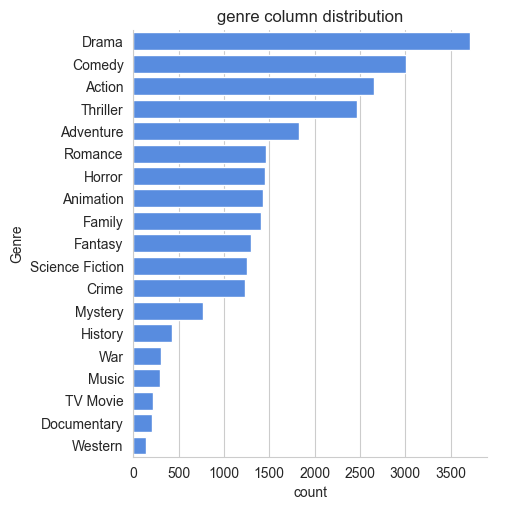

In [116]:
#visualizing genre column
sns.catplot(
    y='Genre',
    data=df,
    kind='count',
    order=df['Genre'].value_counts().index,
    color='#4287f5'
)
plt.title('genre column distribution')
plt.show()

ANS1. Thus we know that Drama gerne is most frequent in the dataset

Q2. What gernes has hignest votes?

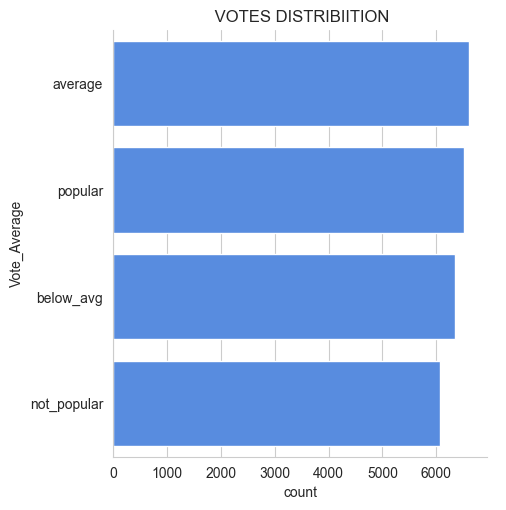

In [117]:
#visualizing vote_avg column
sns.catplot(
            y= 'Vote_Average', 
            data = df, 
            kind ='count', 
            order= df['Vote_Average'].value_counts().index,
            color= '#4287f5'
            )
plt.title(' VOTES DISTRIBIITION')
plt.show()



Q3. what movie got the histest popularity? what's its gerne?

In [118]:
#checking max popularity in dataset
df[df['Popularity']== df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


Q4. What movie got the lowest popularity and its gerne?


In [119]:
#checking the least polular in dataset
df[df['Popularity']== df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,average,History
25549,1984,Threads,13.354,186,popular,War
25550,1984,Threads,13.354,186,popular,Drama
25551,1984,Threads,13.354,186,popular,Science Fiction


Q5. Which year has most fillmed movies?


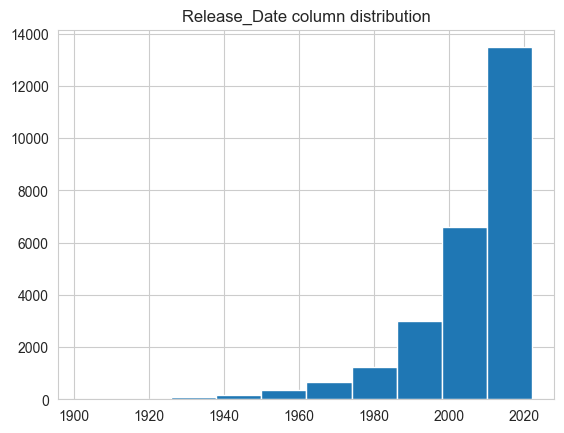

In [120]:
df['Release_Date'].hist()
plt.title('Release_Date column distribution')
plt.show()

 Q1: What is the most frequent 
genre in the dataset?

Ans. Drama genre is the most frequent genre in our dataset and has appeared more than
 14% of the times among 19 other genres.


 Q2: What 
genres has highest 
votes ?

Ans. we have 25.5% of our dataset with popular vote (6520 rows). 
Drama again gets the
 highest popularity among fans by being having more than 18.5% of movies popularities.


 Q3: What movie got the highest 
popularity ? what's its 
Action , 
genre ?

 Ans.Spider-Man: No Way Home has the highest popularity rate in our dataset and it has
 genres of 
Adventure and 
Sience Fiction .


 Q4: What movie got the lowest 
popularity ? what's its 
genre ?

Ans. The united states, thread' has the highest lowest rate in our dataset 
and it has genres of music
 , drama
 , 'war', 'sci-fi' and history`.

 
 Q5: Which year has the most filmmed movies?
 
Ans.2020 has the highest filmming rate in our dataset